## EXPLORATORY DATA ANALYSIS

In [40]:
max_week = severity_accident_clean.CRASH_DAY_OF_WEEK[max(severity_accident_clean.CRASH_DAY_OF_WEEK.value_counts())]
max_hr = severity_accident_clean.CRASH_HOUR[max(severity_accident_clean.CRASH_HOUR.value_counts())]
max_mt = severity_accident_clean.CRASH_MONTH[max(severity_accident_clean.CRASH_MONTH.value_counts())]

Maximum accidents is on the 6 th day of the week with a count of 39211


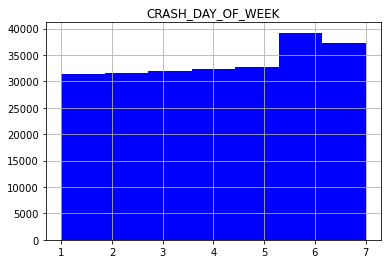

In [41]:
print('Maximum accidents is on the',max_week-1,'th day of the week with a count of',max(severity_accident_clean.CRASH_DAY_OF_WEEK.value_counts()))
severity_accident_clean.hist('CRASH_DAY_OF_WEEK',bins=7,layout=(1,1),color = "blue",sharey=True,sharex=True);

Maximum accidents is on Hour: 16 with a count of 19518


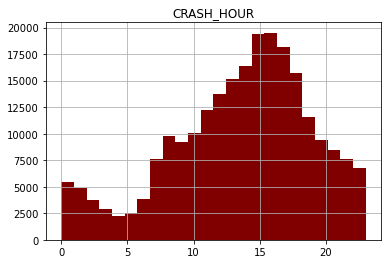

In [42]:
print('Maximum accidents is on Hour:',max_hr-1,'with a count of',max(severity_accident_clean.CRASH_HOUR.value_counts()))
severity_accident_clean.hist('CRASH_HOUR',bins=24,layout=(1,1),color = "maroon",sharey=True,sharex=True);

Maximum accidents is on Month 3 with a count of 22905


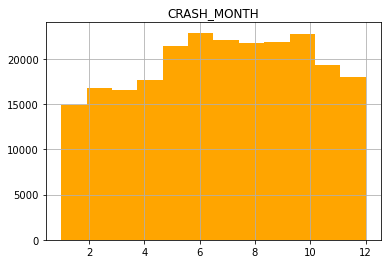

In [43]:
print('Maximum accidents is on Month',max_mt-1,'with a count of',max(severity_accident_clean.CRASH_MONTH.value_counts()))
severity_accident_clean.hist('CRASH_MONTH',bins=12,layout=(1,1),color = "orange",sharey=True,sharex=True);

## Converting variables into categorical as they need to be converted into Dummies

In [44]:
severity_accident_clean[['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'WEATHER_CONDITION', 
         'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE', 
         'ROADWAY_SURFACE_COND', 'ALIGNMENT','SEASON',
         'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE','UNIT_TYPE','VEHICLE_TYPE','SEX',
            'SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','DRIVER_VISION','POSTED_SPEED_RANGE']] = severity_accident_clean[['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'WEATHER_CONDITION', 
         'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE', 
         'ROADWAY_SURFACE_COND', 'ALIGNMENT','SEASON',
         'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE','UNIT_TYPE','VEHICLE_TYPE','SEX',
            'SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','DRIVER_VISION','POSTED_SPEED_RANGE']].astype('category')

In [45]:
#creating the dummies
dummies_V2=['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'WEATHER_CONDITION', 
         'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 
         'ROADWAY_SURFACE_COND', 'ALIGNMENT','SEASON','SEX',
         'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE','UNIT_TYPE','VEHICLE_TYPE',
            'SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','DRIVER_VISION','POSTED_SPEED_RANGE']
severity_accident_clean_dm =  pd.get_dummies(severity_accident_clean, columns = dummies_V2, drop_first = False )

In [46]:
# Removing Further columns after feature engineering or they are no longer needed for analysis
drop_list = ['POSTED_SPEED_LIMIT', 'RD_NO','CRASH_RECORD_ID','INJURIES_UNKNOWN',
             'MOST_SEVERE_INJURY']
severity_accident_clean_dm.drop(columns = drop_list, inplace = True)

## Model Implementation for Severity

In [47]:
# Define Input and Target Variables
Target = severity_accident_clean_dm['SEVERE']
# Removing 'Severe' as it is the output and other variables as it contains non numerical values
Input = severity_accident_clean_dm.drop(columns=['SEVERE','CRASH_DATE','LOCATION','ADDRESS'], axis=1)

In [48]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Input, Target, random_state=10)
print('Training data')
print(y_train.value_counts())
print('\nTesting data')
print(y_test.value_counts())
X_train

Training data
0    114551
1     62642
Name: SEVERE, dtype: int64

Testing data
0    38236
1    20829
Name: SEVERE, dtype: int64


,HIT_AND_RUN_I,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL/SIGN,TRAFFIC_CONTROL_DEVICE_UNKNOWN/OTHER,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN/CLOUDY,WEATHER_CONDITION_SNOW/OTHER,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_OTHER,FIRST_CRASH_TYPE_PARKED/FIXED,FIRST_CRASH_TYPE_PED/CYCLIST,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO (FRONT/SIDE/REAR),FIRST_CRASH_TYPE_SIDESWIPE,FIRST_CRASH_TYPE_TURNING/ANGLE,TRAFFICWAY_TYPE_ALLEY/LANE/INTERSECTION/OTHER,TRAFFICWAY_TYPE_DIVIDED,TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_UNKNOWN,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_SNOW OR SLUSH,...,PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,PRIM_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,PRIM_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,PRIM_CONTRIBUTORY_CAUSE_TEXTING,PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",PRIM_CONTRIBUTORY_CAUSE_WEATHER,UNIT_TYPE_BICYCLE,UNIT_TYPE_DISABLED VEHICLE,UNIT_TYPE_DRIVER,UNIT_TYPE_DRIVERLESS,UNIT_TYPE_NON-CONTACT VEHICLE,UNIT_TYPE_NON-MOTOR VEHICLE,UNIT_TYPE_PARKED,UNIT_TYPE_PEDESTRIAN,VEHICLE_TYPE_BUS/TRUCK/TRAILER,VEHICLE_TYPE_MOTOR DRIVEN CYCLE,VEHICLE_TYPE_OTHER,VEHICLE_TYPE_PASSENGER,VEHICLE_TYPE_SUV/VAN/PICKUP,VEHICLE_TYPE_UNKNOWN/NA,SAFETY_EQUIPMENT_NONE PRESENT/NOT USED,SAFETY_EQUIPMENT_OTHERS,SAFETY_EQUIPMENT_SAFETY EQUIPMENT USED,SAFETY_EQUIPMENT_USAGE UNKNOWN,AIRBAG_DEPLOYED_DEPLOYED,AIRBAG_DEPLOYED_DID NOT DEPLOY,AIRBAG_DEPLOYED_NOT APPLICABLE/UNKNOWN,DRIVER_VISION_NOT OBSCURED,DRIVER_VISION_OBSCURED,DRIVER_VISION_UNKNOWN,POSTED_SPEED_RANGE_0-15,POSTED_SPEED_RANGE_16-25,POSTED_SPEED_RANGE_26-40,POSTED_SPEED_RANGE_41+
12849,1,4,1.0,0.0,0.0,1.0,0.0,7.0,13,1,2,41.750055,-87.682992,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
77060,0,3,0.0,0.0,0.0,0.0,0.0,3.0,10,6,6,41.780405,-87.596879,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
189359,0,2,0.0,0.0,0.0,0.0,0.0,1.0,2,5,10,41.996989,-87.796526,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1